In [1]:
import pandas as pd
colnames=['no', 'Daop', 'Nama_Depo', 'Pemilik', 'Jenis', 'Ket', 'Koordinat_X', 'Koordinat_Y'] 
data = pd.read_excel('data_source/depo.xlsx', sheet_name='depo', names=colnames)
data.head()


,no,Daop,Nama_Depo,Pemilik,Jenis,Ket,Koordinat_X,Koordinat_Y
0,15,DAOP 1 JAKARTA,Depo Lokomotif Jatinegara,PT Kereta Api Indonesia (Persero),Depo Sarana Penggerak,NaN,-6.214245,106.867028
1,16,DAOP 1 JAKARTA,Depo Kereta Jakarta Kota,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,NaN,-6.134634,106.823285
2,19,DAOP 1 JAKARTA,Depo Gerbong Jakarta Gudang,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,NaN,-6.133301,106.818028
3,57,DAOP 1 JAKARTA,Depo Kereta Rangkas Bitung,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,NaN,-6.352703,106.253297
4,67,DAOP 1 JAKARTA,Depo Kereta Jakarta Manggarai,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,NaN,NaN,NaN


In [2]:
data.drop(columns=['no', 'Ket'], inplace = True)

In [3]:
data.head()

,Daop,Nama_Depo,Pemilik,Jenis,Koordinat_X,Koordinat_Y
0,DAOP 1 JAKARTA,Depo Lokomotif Jatinegara,PT Kereta Api Indonesia (Persero),Depo Sarana Penggerak,-6.214245,106.867028
1,DAOP 1 JAKARTA,Depo Kereta Jakarta Kota,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.134634,106.823285
2,DAOP 1 JAKARTA,Depo Gerbong Jakarta Gudang,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.133301,106.818028
3,DAOP 1 JAKARTA,Depo Kereta Rangkas Bitung,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.352703,106.253297
4,DAOP 1 JAKARTA,Depo Kereta Jakarta Manggarai,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,NaN,NaN


In [4]:
data['Jenis'].value_counts(dropna=False)


Depo Sarana Penggerak          33
Depo Sarana Tanpa Penggerak    31
Name: Jenis, dtype: int64

In [5]:
data['Jenis'].unique()

array(['Depo Sarana Penggerak', 'Depo Sarana Tanpa Penggerak'],
      dtype=object)

In [6]:
data['Jenis'].nunique()

2

In [7]:
data.isna().sum()

Daop            0
Nama_Depo       0
Pemilik         0
Jenis           0
Koordinat_X    18
Koordinat_Y    18
dtype: int64

In [8]:
data.shape

(64, 6)

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(46, 6)

In [11]:
data.head()

,Daop,Nama_Depo,Pemilik,Jenis,Koordinat_X,Koordinat_Y
0,DAOP 1 JAKARTA,Depo Lokomotif Jatinegara,PT Kereta Api Indonesia (Persero),Depo Sarana Penggerak,-6.214245,106.867028
1,DAOP 1 JAKARTA,Depo Kereta Jakarta Kota,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.134634,106.823285
2,DAOP 1 JAKARTA,Depo Gerbong Jakarta Gudang,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.133301,106.818028
3,DAOP 1 JAKARTA,Depo Kereta Rangkas Bitung,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.352703,106.253297
7,DAOP 2 BANDUNG,Depo Lokomotif Bandung,PT Kereta Api Indonesia (Persero),Depo Sarana Penggerak,-6.913390,107.599592


In [12]:
jumlah_depo = data.groupby(['Jenis'])['Nama_Depo'].count().reset_index()
print(jumlah_depo)

                         Jenis  Nama_Depo
0        Depo Sarana Penggerak         19
1  Depo Sarana Tanpa Penggerak         27


In [13]:
labels = jumlah_depo['Jenis']
print(labels)
print (type(labels))

0          Depo Sarana Penggerak
1    Depo Sarana Tanpa Penggerak
Name: Jenis, dtype: object
<class 'pandas.core.series.Series'>


In [14]:
sizes = jumlah_depo['Nama_Depo']
print(sizes)
print(type(sizes))

0    19
1    27
Name: Nama_Depo, dtype: int64
<class 'pandas.core.series.Series'>


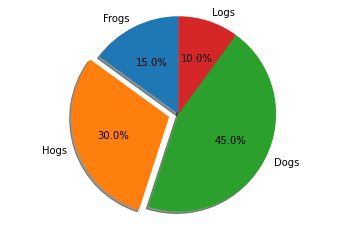

In [15]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

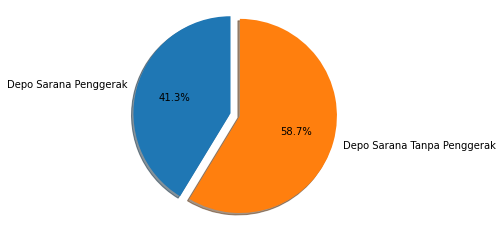

In [16]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = jumlah_depo['Jenis']
#sizes = [19, 27]
sizes = jumlah_depo['Nama_Depo']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#data.to_csv(path_or_buf='data_source/depo_after.csv', sep=',')